In [24]:
import pandas as pd
#from selenium import webdriver
#browser = webdriver.Chrome("chromedriver.exe")

In [ ]:
#url = "https://www.oyorooms.com/oyos-in-bangalore"
#browser.get(url)

# Twitter Scraping

In [13]:
#!pip install tweepy
import tweepy

In [2]:
consumer_key = "0p0FonTDUYemNfPg8epMh6kFO"
consumer_secret = "wPe8tcxhP63cseioDcWeOkj77SdWrNMaXJPQUz2QzKO8LscL25"

access_token = "991382693945360386-doRMFJghJAPN9Krhqc5tSdu6fU9fuby"
access_secret = "xYfzST5UEPDz0WGBUTnEdRCczVk4qSGTt7uKcO2at5iJU"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# ----------------------------------

# Scraping Modi's Tweets

In [4]:
modi_tweets = api.user_timeline("narendramodi", page=1, count=200)
len(modi_tweets)

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/user_timeline.json?id=narendramodi&page=1&count=200 (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Access Denied')))

In [1]:
#first tweets coordinates
modi_tweets[0]._json

NameError: name 'modi_tweets' is not defined

In [9]:
modi_tweets[0].text

'I bow to His Holiness Dr. Sree Sree Sree Sivakumara Swamigalu on his Jayanti. \n\nHe lives in our hearts and minds.… https://t.co/T6CNMHIDjx'

In [10]:
#jeson view
modi_tweets[0]._json

{'created_at': 'Mon Apr 01 03:28:25 +0000 2019',
 'id': 1112557299456004097,
 'id_str': '1112557299456004097',
 'text': 'I bow to His Holiness Dr. Sree Sree Sree Sivakumara Swamigalu on his Jayanti. \n\nHe lives in our hearts and minds.… https://t.co/T6CNMHIDjx',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/T6CNMHIDjx',
    'expanded_url': 'https://twitter.com/i/web/status/1112557299456004097',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [115, 138]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 18839785,
  'id_str': '18839785',
  'name': 'Chowkidar Narendra Modi',
  'screen_name': 'narendramodi',
  'location': 'India',
  'description': 'Prime Minister of In

In [11]:
modi_tweets[0].created_at

datetime.datetime(2019, 4, 1, 3, 28, 25)

In [22]:
modi_tweets[0].source

'Twitter for iPhone'

In [23]:
modi_tweets[0].user.description

'Prime Minister of India'

In [14]:
modi_tweets[0].user.location

'India'

In [16]:
#forget turn on mobile location
print(modi_tweets[0].geo)

None


In [20]:
modi_tweets[0].favorite_count

5873

In [21]:
modi_tweets[0].retweet_count

1490

In [25]:
df_tweet = pd.DataFrame()

for tweet in modi_tweets:
    curr_tweet = {"text":tweet.text, "likes":tweet.favorite_count, "retweets":tweet.retweet_count,
                 "created_at":tweet.created_at, "source":tweet.source}
    df_tweet = df_tweet.append(curr_tweet, ignore_index=True)

In [26]:
df_tweet.head()

,created_at,likes,retweets,source,text
0,2019-04-01 03:28:25,5873.0,1490.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...
1,2019-04-01 03:14:06,3722.0,988.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...
2,2019-04-01 03:11:17,2863.0,736.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...
3,2019-04-01 03:09:43,3310.0,823.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...
4,2019-04-01 03:07:57,9162.0,1738.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...


In [27]:
#scrape 20 page tweets

df_tweets = pd.DataFrame()
for page in range(1, 21):
    modi_tweets = api.user_timeline("narendramodi", page=page, count=200)
    

    for tweet in modi_tweets:
        curr_tweet = {"text":tweet.text, "likes":tweet.favorite_count, "retweets":tweet.retweet_count,
                     "created_at":tweet.created_at, "source":tweet.source}
        df_tweets = df_tweets.append(curr_tweet, ignore_index=True)

In [28]:
df_tweets.head()

,created_at,likes,retweets,source,text
0,2019-04-01 03:28:25,6247.0,1583.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...
1,2019-04-01 03:14:06,3890.0,1046.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...
2,2019-04-01 03:11:17,3001.0,769.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...
3,2019-04-01 03:09:43,3477.0,858.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...
4,2019-04-01 03:07:57,9794.0,1846.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...


In [30]:
df_tweets.shape

(3215, 5)

In [31]:
df_tweets.to_csv("ModiTweets.csv")

# Twitter Analysis

In [32]:
df_tweets.source.value_counts()

Twitter Web Client      1633
Twitter Media Studio     741
Twitter for iPhone       535
Periscope                213
Twitter for Android       92
Twitter Ads Composer       1
Name: source, dtype: int64

In [34]:
df_tweets.sort_values(by="retweets",ascending =False).head()

,created_at,likes,retweets,source,text
357,2019-03-01 16:34:29,271910.0,66478.0,Twitter for iPhone,Welcome Home Wing Commander Abhinandan!\n\nThe...
170,2019-03-16 03:30:15,160811.0,56400.0,Twitter Ads Composer,Your Chowkidar is standing firm &amp; serving ...
490,2019-02-14 13:16:57,130632.0,41242.0,Twitter for Android,Attack on CRPF personnel in Pulwama is despica...
486,2019-02-15 16:29:33,156913.0,37956.0,Twitter for iPhone,"We salute you, brave sons of Mother India. \n\..."
77,2019-03-27 07:11:27,122421.0,35279.0,Twitter Web Client,#MissionShakti is special for 2 reasons:\n(1) ...


In [35]:
df_tweets.sort_values(by="likes",ascending =False).head()

,created_at,likes,retweets,source,text
357,2019-03-01 16:34:29,271910.0,66478.0,Twitter for iPhone,Welcome Home Wing Commander Abhinandan!\n\nThe...
170,2019-03-16 03:30:15,160811.0,56400.0,Twitter Ads Composer,Your Chowkidar is standing firm &amp; serving ...
486,2019-02-15 16:29:33,156913.0,37956.0,Twitter for iPhone,"We salute you, brave sons of Mother India. \n\..."
490,2019-02-14 13:16:57,130632.0,41242.0,Twitter for Android,Attack on CRPF personnel in Pulwama is despica...
81,2019-03-27 05:53:17,129102.0,33082.0,Twitter Web Client,"मेरे प्यारे देशवासियों, \n\nआज सवेरे लगभग 11.4..."


In [36]:
df_tweets["created_at"]=pd.to_datetime(df_tweets.created_at)
df_tweets.dtypes

created_at    datetime64[ns]
likes                float64
retweets             float64
source                object
text                  object
dtype: object

In [37]:
df_tweets.created_at.min(), df_tweets.created_at.max()

(Timestamp('2018-06-21 10:36:05'), Timestamp('2019-04-01 03:28:25'))

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

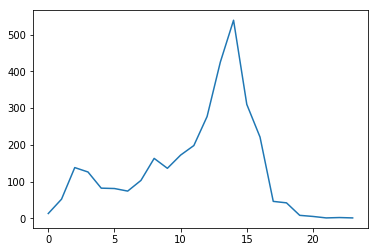

In [41]:
df_tweets["Hour"] = df_tweets.created_at.dt.hour
df_tweets.Hour.value_counts().sort_index().plot()
plt.show()

In [ ]:
import pytz.timezone as tmz
kolkata = tmz.timezone("Asia/Calcutta")

df_tweets.created_at.apply(lambda v: kolkata.localize

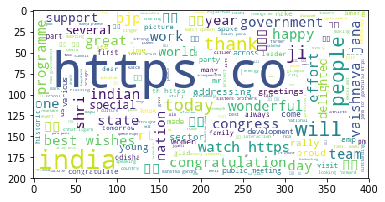

In [48]:
from wordcloud import WordCloud
doc = df_tweets.text.str.lower()
doc = " ".join(doc)

wc = WordCloud(background_color="white").generate(doc)
plt.imshow(wc)

#get the hash tags

create a empty list called as hash tag
loop through each tweets 
break each tweets in words by split string by space
identify if a word start with #
if so append the word to hashtag list
convert it to series and value counts to get frequency odf each hash tag

In [61]:

hash_tag = []
for tweet in df_tweets.text:
    words = tweet.split()
    
    tags = [tag for tag in words if tag.startswith("#")]
    hash_tag.extend(tags)

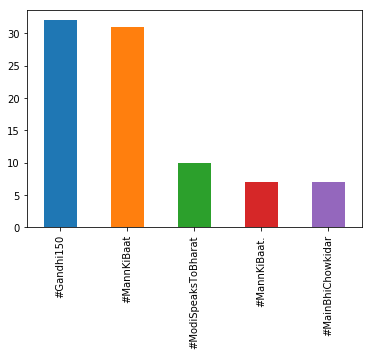

In [64]:
hashtag = pd.Series(hash_tag)
hashtag.value_counts().head().plot(kind="bar")

# how frequency of hash tag accross month

In [ ]:
create a new column for month
grouby month

In [75]:
df_tweets["Month_Year"] = df_tweets.created_at.dt.strftime("%Y-%m")

In [70]:

df_tweets["Mannkibaat"] = df_tweets.text.apply(lambda  text: 1 if "MannKiBaat" in text else 0)


In [71]:
df_tweets.Mannkibaat.value_counts()

0    3169
1      46
Name: Mannkibaat, dtype: int64

In [76]:
df_tweets[["Month_Year","Mannkibaat"]].head()

,Month_Year,Mannkibaat
0,2019-04,0
1,2019-04,0
2,2019-04,0
3,2019-04,0
4,2019-04,0


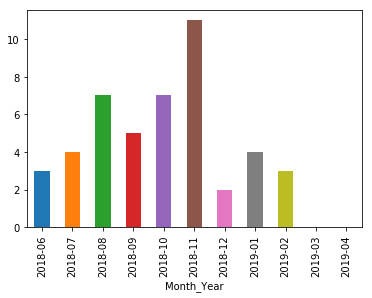

In [79]:
df_tweets.groupby("Month_Year")["Mannkibaat"].sum().plot(kind="bar")

# -----------

In [81]:
df_tweets["Day"] = df_tweets.created_at.dt.day
df_tweets["weekday"] = df_tweets.created_at.dt.day_name()

In [83]:
summary =df_tweets.groupby(["Month_Year", "Day"]).size().reset_index()
summary = summary.rename(columns={0:"count"})
summary.head()

,Month_Year,Day,count
0,2018-06,21,34
1,2018-06,22,3
2,2018-06,23,11
3,2018-06,24,10
4,2018-06,25,3


In [85]:
summary_pivot = summary.pivot("Month_Year","Day","count")
summary_pivot

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month_Year,,,,,,,,,,,,,,,,,,,,,
2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,10.0,3.0,19.0,8.0,9.0,7.0,4.0,NaN
2018-07,9.0,3.0,2.0,9.0,2.0,5.0,6.0,2.0,8.0,8.0,...,7.0,7.0,10.0,8.0,10.0,7.0,5.0,18.0,5.0,2.0
2018-08,5.0,6.0,8.0,1.0,2.0,5.0,13.0,2.0,8.0,8.0,...,7.0,13.0,7.0,6.0,19.0,9.0,10.0,14.0,10.0,19.0
2018-09,13.0,6.0,7.0,49.0,25.0,3.0,5.0,2.0,1.0,7.0,...,11.0,8.0,2.0,16.0,6.0,22.0,8.0,13.0,20.0,NaN
2018-10,4.0,40.0,10.0,13.0,8.0,14.0,7.0,3.0,8.0,9.0,...,11.0,14.0,16.0,7.0,10.0,11.0,13.0,11.0,14.0,27.0
2018-11,11.0,15.0,7.0,7.0,14.0,10.0,9.0,6.0,10.0,7.0,...,6.0,12.0,16.0,26.0,21.0,19.0,13.0,5.0,14.0,NaN
2018-12,23.0,3.0,17.0,13.0,11.0,2.0,7.0,1.0,7.0,7.0,...,8.0,15.0,15.0,13.0,5.0,6.0,10.0,11.0,22.0,10.0
2019-01,4.0,9.0,13.0,13.0,12.0,5.0,1.0,14.0,13.0,3.0,...,8.0,13.0,31.0,15.0,8.0,15.0,15.0,17.0,13.0,2.0
2019-02,3.0,12.0,16.0,3.0,2.0,1.0,8.0,15.0,17.0,19.0,...,13.0,13.0,22.0,14.0,7.0,1.0,1.0,NaN,NaN,NaN


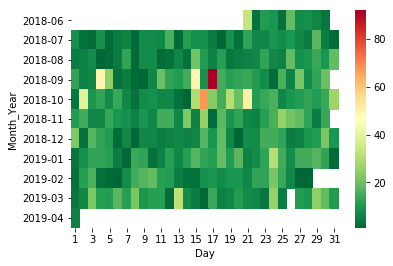

In [88]:
import seaborn as sns
sns.heatmap(summary_pivot, cmap="RdYlGn_r")

## Twitter Scraping for a hashtag/search term

In [90]:
tweets = api.search("#ModiMatBanao",count=200)
len(tweets)

89

In [91]:
tweets[0]._json

{'created_at': 'Mon Apr 01 10:48:13 +0000 2019',
 'id': 1112667980704313346,
 'id_str': '1112667980704313346',
 'text': "RT @NCPspeaks: This time don't forget to vote against 'BURE DIN'.. \n\n#KamalKaPhoolBanayeFool #Modimatbanao #NCP2019 #LoksabhaElections2019…",
 'truncated': False,
 'entities': {'hashtags': [{'text': 'KamalKaPhoolBanayeFool',
    'indices': [69, 92]},
   {'text': 'Modimatbanao', 'indices': [93, 106]},
   {'text': 'NCP2019', 'indices': [107, 115]},
   {'text': 'LoksabhaElections2019', 'indices': [116, 138]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'NCPspeaks',
    'name': 'NCP',
    'id': 1670467506,
    'id_str': '1670467506',
    'indices': [3, 13]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str'

In [96]:
for tw in tweets:
    print(tw.user.location,"#",tw.user.name,"#",tw.user.screen_name)

मुंबई, भारत # NDH # HavaldarND
India # Ajay Pandey # Ajay97470427
मुंबई, भारत # NDH # HavaldarND
Kolkata, India # Pravishek Singh # pravishek
Chandigarh # Rajat Battu # rajatbattu
India # Hussain A W # hussain1585
India # Manish Kumar # MANISHK82994121
India # Dr. priyaranjan # Dr_priyaranjan_
Gujarat, Bombay # 🇮🇳 Murtuza (INC) ☪🕉✝✡ में चौकीदार नही हु # murtuzaspeaks
Dar es Salaam, Tanzania # Anish Jacob Vadakkedath # ajvassure7
 # Dr. vaishali Desai # VaishaliTater
 # Abi P kkar # abiPkkAR
Panditwari, Dehradun # Amit godiyal # amitonlyandonly
Chhattisgarh, India # Abhay Chouhan # AbhayCh35934556
 # Somesh Singh Chauhan # someshsinghIYC
 # Binal Chaudhary # chaudhary_binal
कालीघाट, कोलकाता # sanjaybhandia # sanju64
Neverland # GST Practitioner # GSTPractice
 # Read my bio-Angry young man # khr6655
Hisar, India # Vikram Dangi Majra # VikramDangi10
India # Ajit, an Indian # Ajit99701175
India # Ch Abdul Qayoom Kalas # Hind_sar_zameen
 # Berojgar Shekhar Rajpoot tet super tet pass # Shekh

In [98]:
for tw in tweets:
    print(tw.user.friends_count, "#",tw.user.description)

109 # 
476 # 
109 # 
358 # 
49 # Attitude:Be +iv. Life:Do not take seriously.Politics :Dirty game! Just Avoid.India :-Best Grown Democracy.
Works :-Sales Manager in Chandigarh.
1782 # BATMAN Fan with JOKER fanatics,
💻Software engg💻
Still figuring out the correct self description,
the sarcastic one though
Like to ☕🏞🛌🛣🚗
92 # शेर को जगाना और हमें सुलाना किसी के बस  के बात नहीं

क्यूंकि

हम ज़हाँ खड़े होते है वहाँ #

हमारे  वतन आज भी आग लगाते है !
71 # Gold medalist , Social justice , Learn from yesterday , live for today, Hope for 2mrw .
6378 # @Sudheenkulkarni @rahulEaswar @alfonslopeztena @sadhavi @BruceVH @lalitnagarmla @_garrywalia Blkd by @asadowaisi @kapilmishra_IND @smitaprakash
205 # Insurance is life! 
Insurance – The art of making the impossible, possible!!!
(Professional Insurer, personal tweets! Retweets are not endorsements!)
1060 # Anti stupid!!
689 # Author,   philosopher and researcher about the power of religion.
1223 # महानगर उपाध्यक्ष ऐवम कैंट विधानसभा प्रभारी(IT प्रकोष्ठ

In [111]:
tweet_df = pd.DataFrame()
for tw in tweets:
    curr_tweet = {"display_"}
    print(tw.user.location,"#",tw.user.name,"#",tw.user.screen_name)

मुंबई, भारत # NDH # HavaldarND
India # Ajay Pandey # Ajay97470427
मुंबई, भारत # NDH # HavaldarND
Kolkata, India # Pravishek Singh # pravishek
Chandigarh # Rajat Battu # rajatbattu
India # Hussain A W # hussain1585
India # Manish Kumar # MANISHK82994121
India # Dr. priyaranjan # Dr_priyaranjan_
Gujarat, Bombay # 🇮🇳 Murtuza (INC) ☪🕉✝✡ में चौकीदार नही हु # murtuzaspeaks
Dar es Salaam, Tanzania # Anish Jacob Vadakkedath # ajvassure7
 # Dr. vaishali Desai # VaishaliTater
 # Abi P kkar # abiPkkAR
Panditwari, Dehradun # Amit godiyal # amitonlyandonly
Chhattisgarh, India # Abhay Chouhan # AbhayCh35934556
 # Somesh Singh Chauhan # someshsinghIYC
 # Binal Chaudhary # chaudhary_binal
कालीघाट, कोलकाता # sanjaybhandia # sanju64
Neverland # GST Practitioner # GSTPractice
 # Read my bio-Angry young man # khr6655
Hisar, India # Vikram Dangi Majra # VikramDangi10
India # Ajit, an Indian # Ajit99701175
India # Ch Abdul Qayoom Kalas # Hind_sar_zameen
 # Berojgar Shekhar Rajpoot tet super tet pass # Shekh

In [100]:
df_tweet = pd.DataFrame()
for tw in tweets:
    curr_tweet = {"display_name":tw.user.name,"location":tw.user.location,"handler_name":tw.user.screen_name,
                 "created_at":tw.created_at,"followers":tw.user.followers_count,"friends":tw.user.friends_count,
                 "user_desc":tw.user.description,"user_location":tw.user.location,"likes":tw.favorite_count,
                 "retweets":tw.retweet_count}
    df_tweet = df_tweet.append(curr_tweet,ignore_index=True)

In [101]:
df_tweet.head()

,created_at,display_name,followers,friends,handler_name,likes,location,retweets,user_desc,user_location
0,2019-04-01 10:48:13,NDH,38.0,109.0,HavaldarND,0.0,"मुंबई, भारत",13.0,,"मुंबई, भारत"
1,2019-04-01 10:48:13,Ajay Pandey,65.0,476.0,Ajay97470427,0.0,India,72.0,,India
2,2019-04-01 10:48:12,NDH,38.0,109.0,HavaldarND,0.0,"मुंबई, भारत",16.0,,"मुंबई, भारत"
3,2019-04-01 10:48:11,Pravishek Singh,106.0,358.0,pravishek,0.0,"Kolkata, India",580.0,,"Kolkata, India"
4,2019-04-01 10:48:11,Rajat Battu,154.0,49.0,rajatbattu,0.0,Chandigarh,52.0,Attitude:Be +iv. Life:Do not take seriously.Po...,Chandigarh


In [102]:
df_tweet.shape

(89, 10)

# Tweeter cursor concept till the time end

In [115]:
df_tweets = pd.DataFrame()
for tw in tweepy.Cursor(api.search, "#ModiMatBanao").items():
    curr_tweet = {"display_name":tw.user.name,"location":tw.user.location,"handler_name":tw.user.screen_name,
                 "created_at":tw.created_at,"followers":tw.user.followers_count,"friends":tw.user.friends_count,
                 "user_desc":tw.user.description,"user_location":tw.user.location,"likes":tw.favorite_count,
                 "retweets":tw.retweet_count}
    df_tweets = df_tweets.append(curr_tweet,ignore_index=True)

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%23ModiMatBanao (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001C9A470F0F0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [116]:
df_tweets.shape

(0, 0)

In [107]:
df_tweet.user_location.value_counts()

                                  21
India                             15
Gujarat, India                     5
Gorakhpur, India                   3
Kolkata, India                     3
Punjab, India                      3
मुंबई, भारत                        2
Chhattisgarh, India                2
Panditwari, Dehradun               2
Mumbai                             2
latur                              1
कालीघाट, कोलकाता                   1
Fatehpur,Uttar Pradesh, India      1
New Delhi, India                   1
Ahmedabad, Gujarat, India          1
mumbai                             1
Haryana, India                     1
Gujarat, Bombay                    1
Neverland                          1
New Delhi                          1
धनबाद, भारत                        1
 Gujarat, india                    1
Allahabad, India                   1
Jilin, People's Republic of Ch     1
Bhopal, India                      1
Hisar, India                       1
Lucknow, India                     1
N

# ---------------------------------

In [18]:
consumer_key = "SXhLp1YQtRNEwI2DOtoQ1GOPS"
consumer_secret = "y7LryBjL9w3k3uQg5NPvKQ4Te6L1Di0prb2URGSro3Zimfm7Fx"

access_token = "991382693945360386-HiKKrfdpUJAoRfuKs5EEeKsvihbhknh"
access_secret = "yBRNfIyoYUU8FXhdntg5BiuioRso340eAJ89xMRCqv56P"

In [19]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [21]:
modi_tweets = api.user_timeline("akshaykumar", page=1, count=200)
len(modi_tweets)

200

In [22]:
modi_tweets[0].

Status(_api=<tweepy.api.API object at 0x0000021CD84DD6A0>, _json={'created_at': 'Mon Apr 01 06:06:55 +0000 2019', 'id': 1112597189610491904, 'id_str': '1112597189610491904', 'text': 'Changes like these make you feel it’s all worthwhile 🙏🏻 https://t.co/6H6NdPSAUk', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/6H6NdPSAUk', 'expanded_url': 'https://twitter.com/nigam15073/status/1112575845606936576', 'display_url': 'twitter.com/nigam15073/sta…', 'indices': [56, 79]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 31348594, 'id_str': '31348594', 'name': 'Akshay Kumar', 'screen_name': 'akshaykumar', 'location': '', 'description': '', 'url': 'https://t.co/nVpOquvNp0', 'entities': {'url': {'urls': [{'

In [24]:
import pandas as pd

In [25]:
akshay_tweet = pd.DataFrame()

for tweet in modi_tweets:
    curr_tweet = {"text":tweet.text, "likes":tweet.favorite_count, "retweets":tweet.retweet_count,
                 "created_at":tweet.created_at, "source":tweet.source}
    akshay_tweet = akshay_tweet.append(curr_tweet, ignore_index=True)

In [27]:
akshay_tweet.head()

,created_at,likes,retweets,source,text
0,2019-04-01 06:06:55,6568.0,604.0,Twitter for iPhone,Changes like these make you feel it’s all wort...
1,2019-04-01 04:47:09,25969.0,2138.0,Twitter Media Studio,"It’s always a good idea to start young, their ..."
2,2019-03-30 10:38:17,16156.0,1565.0,Twitter for iPhone,"I am a proud participant of Earth Hour, are yo..."
3,2019-03-28 13:56:48,19464.0,1017.0,Twitter for iPhone,😁🙏🏻 https://t.co/08cg0LfEV7
4,2019-03-28 08:35:34,16153.0,1372.0,Twitter for iPhone,"It's been overwhelming, this journey of #Kesar..."


In [38]:
akshay_tweet.created_at.dt.

0      2019
1      2019
2      2019
3      2019
4      2019
5      2019
6      2019
7      2019
8      2019
9      2019
10     2019
11     2019
12     2019
13     2019
14     2019
15     2019
16     2019
17     2019
18     2019
19     2019
20     2019
21     2019
22     2019
23     2019
24     2019
25     2019
26     2019
27     2019
28     2019
29     2019
       ... 
170    2019
171    2019
172    2019
173    2019
174    2019
175    2019
176    2019
177    2019
178    2019
179    2019
180    2019
181    2019
182    2019
183    2019
184    2019
185    2019
186    2019
187    2019
188    2019
189    2019
190    2019
191    2018
192    2018
193    2018
194    2018
195    2018
196    2018
197    2018
198    2018
199    2018
Name: created_at, Length: 200, dtype: int64